# Building Two Layer Neural Network: Step by Step


**After this assignment you will be able to:**
- Use non-linear units like ReLU to improve your model
- Build a deeper neural network (with more than 1 hidden layer)
- Implement an easy-to-use neural network class
- These functions will be used in next Notebook to develop Deep NN.

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

Let's get started!

## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed. 

In [34]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##  2- Some Important Functions that will  be used later

In [35]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [36]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [37]:
def relu_dropout(Z, rate=0.5):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    D = np.random.rand(A.shape[0], A.shape[1]) < (1-rate)
    A = A * D / (1-rate)                     
    
    assert(A.shape == Z.shape)

    cache = Z 
    return A, cache, (np.count_nonzero(D))/D.size

In [38]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [39]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

## 3 - Outline 

To build your neural network, you need several "helper functions". Each small helper function you will implement will have detailed instructions that will walk you through the necessary steps. Here is an outline of this notebook, you will:

- Initialize the parameters for a two-layer network and for an $L$-layer neural network.
- Implement the forward propagation module (shown in purple in the figure below).
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - We give you the ACTIVATION function (relu/sigmoid).
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).
    - Complete the LINEAR part of a layer's backward propagation step.
    - We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally update the parameters.


**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This notebook will show you exactly how to carry out each of these steps. 

## 4 - Initialization

We will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to $L$ layers.

###  2-layer Neural Network

**Instructions**:
- The model's structure is: *LINEAR -> RELU -> LINEAR -> SIGMOID*. 
- Use random initialization for the weight matrices. Use `np.random.randn(shape)*0.01` with the correct shape.
- Use zero initialization for the biases. Use `np.zeros(shape)`.

In [40]:

def initialize_parameters(n_x, n_h, n_y):
       
    np.random.seed(1)
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [41]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


### L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. Thus for example if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:


Remember that when we compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**Instructions**:
- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use `np.random.randn(shape) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. 

For example, the `layer_dims` for the "Planar Data classification model" in this notebook would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers! 
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [42]:

def initialize_parameters_deep(layer_dims):
       
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [43]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


## 5 - Forward propagation module

### Linear Forward 
Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 


**Reminder**:
The mathematical representation of this unit is $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$. You may also find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help.

In [44]:

def linear_forward(A, W, b):
    
    Z = np.dot(W,A) +b
    
    cache = (A, W, b)
    
    return Z, cache

In [45]:
# A, W, b = linear_forward_test_case()

linear_forward_test_case = lambda : (np.array([[1.62434536, -0.61175641],
                                                [-0.52817175, -1.07296862],
                                                [0.86540763, -2.3015387 ]]),
 np.array([[-1.07296862,  0.86540763, -2.3015387 ],
          [ 1.74481176, -0.7612069 ,  0.3190391 ]]), 
np.array([[0.]]))

A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[-4.19172461  5.02492059]
 [ 3.51232374 -0.9849295 ]]


### 4.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We have provided you with the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We have provided you with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

For more convenience, you are going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). Hence, you will implement a function that does the LINEAR forward step followed by an ACTIVATION forward step.
Exercise: Implement the forward propagation of the LINEAR->ACTIVATION layer. Mathematical relation is: 
𝐴
[𝑙]
=𝑔(
𝑍
[𝑙]
)=𝑔(
𝑊
[𝑙]
𝐴
[𝑙−1]
+
𝑏
[𝑙]
)
A[l]=g(Z[l])=g(W[l]A[l−1]+b[l])
where the activation "g" can be sigmoid() or relu(). Use linear_forward() and the correct activation function.

In [46]:

def linear_activation_forward_BN(A_prev, W, b, activation):
        
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        non_zero = None
       
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        # A, activation_cache, non_zero = relu_dropout(Z)       
    
    cache = (linear_cache, activation_cache)

    return A, cache

In [47]:

def linear_activation_forward(A_prev, W, b, activation, rate=0.3):
        
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        non_zero = None
       
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        # A, activation_cache = relu(Z)
        A, activation_cache, non_zero = relu_dropout(Z, rate=rate)       
    
    cache = (linear_cache, activation_cache)

    return A, cache, non_zero

### d) L-Layer Model 

For even more convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

Implementing the forward propagation of the above model.

**Instruction**: In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.) 

**Tips**:
- Use the functions you had previously written 
- Use a for loop to replicate [LINEAR->RELU] (L-1) times
- Don't forget to keep track of the caches in the "caches" list. To add a new value `c` to a `list`, you can use `list.append(c)`.

In [48]:

def L_model_forward(X, parameters, rate):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    total_non_zero = []
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        
        A, cache, non_zero = linear_activation_forward(A_prev, parameters["W"+ str(l)], parameters["b"+ str(l)], activation = "relu", rate=rate)
        total_non_zero.append(non_zero)
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache, non_zero = linear_activation_forward(A, parameters["W"+ str(L)], parameters["b"+ str(L)], activation = "sigmoid")
    caches.append(cache)
    
           
    return AL, caches, total_non_zero

In [49]:

def L_model_forward_BN(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    total_non_zero = []
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        
        A, cache = linear_activation_forward_BN(A_prev, parameters["W"+ str(l)], parameters["b"+ str(l)], activation = "relu")
        mean=np.mean(A)
        variance=np.var(A)
        A = (A - mean)/np.sqrt(variance + 1e-8)
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward_BN(A, parameters["W"+ str(L)], parameters["b"+ str(L)], activation = "sigmoid")
    caches.append(cache)
    
           
    return AL, caches

## 6 - Cost function

Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning.

**Exercise**: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [50]:

def compute_cost(AL, Y):
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = -np.sum((np.multiply(Y,np.log(AL)) + np.multiply((1-Y),np.log(1-AL))))/m
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
   
    return cost

In [51]:
compute_cost_test_case = lambda : (np.array([[0.8, 0.9, 0.4]]), np.array([[1, 1, 0]]))

Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = inf


C:\Users\pande\AppData\Local\Temp\ipykernel_23956\2292183636.py:6: RuntimeWarning: divide by zero encountered in log
  cost = -np.sum((np.multiply(Y,np.log(AL)) + np.multiply((1-Y),np.log(1-AL))))/m


## 7 - Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters. 

**Reminder**: 

<!-- 
For those of you who are expert in calculus (you don't need to be to do this assignment), the chain rule of calculus can be used to derive the derivative of the loss $\mathcal{L}$ with respect to $z^{[1]}$ in a 2-layer network as follows:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

In order to calculate the gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, you use the previous chain rule and you do $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. During the backpropagation, at each step you multiply your current gradient by the gradient corresponding to the specific layer to get the gradient you wanted.

Equivalently, in order to calculate the gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, you use the previous chain rule and you do $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

This is why we talk about **backpropagation**.
!-->

Now, similar to forward propagation, you are going to build the backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

### 7.1 - Linear backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


In [52]:

def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    
    return dA_prev, dW, db

In [53]:
# Set up some test inputs
linear_backward_test_case = lambda : (
    np.array([[1.62434536, -0.61175641],   # dZ shape (2,2)
              [-0.52817175, -1.07296862]]),
    (
        np.array([[ 0.61167629, -0.52817175],   # A_prev shape (2,2)
                  [ 0.86540763, -2.3015387 ]]),
        np.array([[ 0.5, -0.1],                 # W shape (2,2)
                  [ 0.3,  0.8]]),
        np.array([[0.], [0.]])                  # b shape (2,1)
    )
)
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.65372115 -0.62776879]
 [-0.58497194 -0.79719925]]
dW = [[0.658343   1.40685096]
 [0.12182079 1.00619747]]
db = [[ 0.50629448]
 [-0.80057018]]


### 7.2 - Linear-Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

To help you implement `linear_activation_backward`, we provided two backward functions:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

Implementing the backpropagation for the *LINEAR->ACTIVATION* layer.

In [54]:

def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, cache[1])
        dA_prev, dW, db = linear_backward(dZ, cache[0])
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, cache[1])
        dA_prev, dW, db = linear_backward(dZ, cache[0])
    
    return dA_prev, dW, db

In [55]:
linear_activation_backward_test_case = lambda : (
    np.array([[1.62434536, -0.61175641],   # dA
              [-0.52817175, -1.07296862]]),
    (
        (   # linear_cache
            np.array([[ 0.61167629, -0.52817175],   # A_prev
                      [ 0.86540763, -2.3015387 ]]),
            np.array([[ -1.07296862, 0.86540763],   # W
                      [  1.74481176, -0.7612069 ]]),
            np.array([[0.], [0.]])                  # b
        ),
        np.array([[0.3190391, -0.24937038],          # activation_cache = Z
                  [0.21220659, -1.23005814]])
    )
)

dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[-0.65263153 -0.16608188]
 [ 0.44202598  0.01262783]]
dW = [[0.16085678 0.34460816]
 [0.0096598  0.15960434]]
db = [[ 0.1226699 ]
 [-0.15917806]]

relu:
dA_prev = [[-2.66443188  0.        ]
 [ 1.80776885  0.        ]]
dW = [[ 0.49678677  0.70286043]
 [-0.16153507 -0.22854193]]
db = [[ 0.81217268]
 [-0.26408588]]


### 7.3 - L-Model Backward 

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass. 



** Initializing backpropagation**:
To backpropagate through this network, we know that the output is, 
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

 Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [56]:

def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [57]:
def L_model_backward_test_case():
    np.random.seed(3)
    AL = np.random.randn(1, 4)  # 1 output unit, 4 examples
    Y = np.array([[1, 0, 1, 1]])  # Example true labels

    # Cache for layer 1 (linear -> ReLU)
    A_prev1 = np.random.randn(3, 4)  # 3 units in hidden layer, 4 examples
    W1 = np.random.randn(3, 2)       # Weights from input (2 features) to hidden (3 units)
    b1 = np.random.randn(3, 1)
    Z1 = np.random.randn(3, 4)
    linear_cache1 = (A_prev1, W1, b1)
    activation_cache1 = Z1
    cache1 = (linear_cache1, activation_cache1)

    # Cache for layer 2 (linear -> Sigmoid)
    A_prev2 = A_prev1                # Output from previous layer
    W2 = np.random.randn(1, 3)       # Weights from hidden (3 units) to output (1 unit)
    b2 = np.random.randn(1, 1)
    Z2 = np.random.randn(1, 4)
    linear_cache2 = (A_prev2, W2, b2)
    activation_cache2 = Z2
    cache2 = (linear_cache2, activation_cache2)

    caches = [cache1, cache2]

    return AL, Y, caches

In [58]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
# print(grads)
# def print_grads(grads):
#     L = len(grads) // 3 # number of layers in the neural network
#     for l in range(L):
#         print("dW" + str(l+1) + " = "+ str(grads["dW" + str(l + 1)]))
#         print("db" + str(l+1) + " = "+ str(grads["db" + str(l + 1)]))
#         print("dA" + str(l+1) + " = "+ str(grads["dA" + str(l + 1)]))


def print_grads(grads):
    # Extract layer numbers from gradient keys
    layer_numbers = set()
    for key in grads.keys():
        if key.startswith('dW') or key.startswith('db') or key.startswith('dA'):
            try:
                layer_num = int(key[2:])  # Extract number after 'dW', 'db', or 'dA'
                layer_numbers.add(layer_num)
            except:
                continue
    
    # Sort layer numbers
    layer_numbers = sorted(layer_numbers)
    
    # Print gradients for each layer
    for l in layer_numbers:
        if f"dW{l}" in grads:
            print(f"dW{l} = {grads[f'dW{l}']}")
        if f"db{l}" in grads:
            print(f"db{l} = {grads[f'db{l}']}")
        if f"dA{l}" in grads:
            print(f"dA{l} = {grads[f'dA{l}']}")
        
print_grads(grads)

dA0 = [[ 0.          0.7146888  -1.45019292  0.        ]
 [ 0.          0.14866238  1.62542082  0.        ]]
dW1 = [[ 0.03903602  0.05251084 -0.18811341]
 [-0.01231628  0.42724447  0.18803967]
 [ 0.          0.          0.        ]]
db1 = [[-0.11003532]
 [-0.24826239]
 [ 0.        ]]
dA1 = [[ 0.12913162 -0.44014127  1.34474919 -0.12582543]
 [-0.14175655  0.48317296 -1.47622251  0.13812712]
 [ 0.01663708 -0.05670698  0.17325496 -0.01621111]]
dW2 = [[-0.02147491  0.40867788  0.12707748]]
db2 = [[-0.22168561]]


 ### 7.4 - Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 


**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 


In [59]:

def update_parameters(parameters, grads, learning_rate):
       
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] =  parameters["W" + str(l+1)] -(learning_rate* grads["dW"+ str(l+1)])
        parameters["b" + str(l+1)] =  parameters["b" + str(l+1)] -(learning_rate* grads["db"+ str(l+1)])
    return parameters

In [60]:
def update_parameters_test_case():
    parameters = {
        'W1': np.array([[ 0.01624345, -0.00611756, -0.00528172],
                        [ 0.01016998,  0.04105985, -0.01420664]]), 
        'b1': np.array([[0.], [0.]]), 
        'W2': np.array([[-0.00757545, -0.01250722]]), 
        'b2': np.array([[0.]])
    }
    
    grads = {
        'dW1': np.array([[ 0.00018733, -0.00019033, -0.00020411],
                         [-0.00010471,  0.00010267,  0.00011046]]),
        'db1': np.array([[-0.00068527], [ 0.00030314]]),
        'dW2': np.array([[-0.00093748, -0.00022857]]),
        'db2': np.array([[-0.0008815 ]])
    }
    
    return parameters, grads
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[ 0.01622472 -0.00609853 -0.00526131]
 [ 0.01018045  0.04104958 -0.01421769]]
b1 = [[ 6.8527e-05]
 [-3.0314e-05]]
W2 = [[-0.0074817  -0.01248436]]
b2 = [[8.815e-05]]


### Now we have defined a Two Layer NN Model

#### So lets Load some data

In [61]:
train_dataset = h5py.File('./train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('./test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_y = train_y_orig.reshape((1, train_y_orig.shape[0]))
test_y = test_y_orig.reshape((1, test_y_orig.shape[0]))
    


y = 0. It's a non-cat picture.


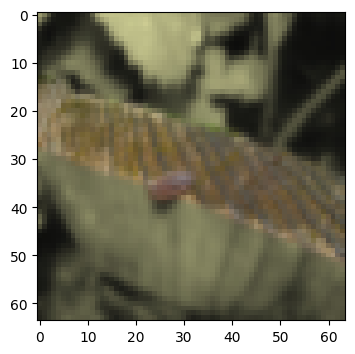

In [62]:
# Example of a picture
index = 12
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [63]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [64]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Architecture of the Model
Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

Let's look at the two architectures.

### 2-layer neural network


<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.

###  L-layer deep neural network

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

###  General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those two models!

In [65]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

### Lets define two functions to test the model

In [90]:
def predict(X, y, parameters, rate=0.3):
        
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches, non_zero = L_model_forward(X, parameters, rate=rate)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

def print_mislabeled_images(classes, X, y, p):
   
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


In [67]:
### CONSTANTS ###
layers_dims = [12288, 60, 40, 20, 7, 5, 1] #  4-layer model

In [86]:
def L_layer_model(X, Y, layers_dims, blackOutRate=0.3, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    non_zero=[]
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches, total_non_zero = L_model_forward(X, parameters, rate=blackOutRate)
        
        non_zero.append(sum(total_non_zero)/len(total_non_zero))
        # Compute cost.
        cost = compute_cost(AL,Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # print("Non-zero percentage per layer: " + str(non_zero)) 
    # plot the cost
    # plt.plot(np.squeeze(costs))
    # plt.ylabel('cost')
    # plt.xlabel('iterations (per hundreds)')
    # plt.title("Learning rate =" + str(learning_rate))
    # plt.show()
    
    return parameters, costs, sum(non_zero)/len(non_zero)

In [73]:
def L_layer_model_BN(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 4000, print_cost=False):#lr was 0.009
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    non_zero=[]
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward_BN(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL,Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    # plot the cost
    # plt.plot(np.squeeze(costs))
    # plt.ylabel('cost')
    # plt.xlabel('iterations (per hundreds)')
    # plt.title("Learning rate =" + str(learning_rate))
    # plt.show()
    
    return parameters, costs

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.678010
Cost after iteration 200: 0.667598
Cost after iteration 300: 0.660420
Cost after iteration 400: 0.655455
Cost after iteration 500: 0.652011
Cost after iteration 600: 0.649613
Cost after iteration 700: 0.647943
Cost after iteration 800: 0.646768
Cost after iteration 900: 0.645947
Cost after iteration 1000: 0.645370
Cost after iteration 1100: 0.644957
Cost after iteration 1200: 0.644671
Cost after iteration 1300: 0.644467
Cost after iteration 1400: 0.644329
Cost after iteration 1500: 0.644222
Cost after iteration 1600: 0.644151
Cost after iteration 1700: 0.644096
Cost after iteration 1800: 0.644063
Cost after iteration 1900: 0.644038
Cost after iteration 2000: 0.644018
Cost after iteration 2100: 0.644008
Cost after iteration 2200: 0.643998
Cost after iteration 2300: 0.643991
Cost after iteration 2400: 0.643984
Cost after iteration 2500: 0.643981
Cost after iteration 2600: 0.643978
Cost after iteration 2700: 0.643977
Cost

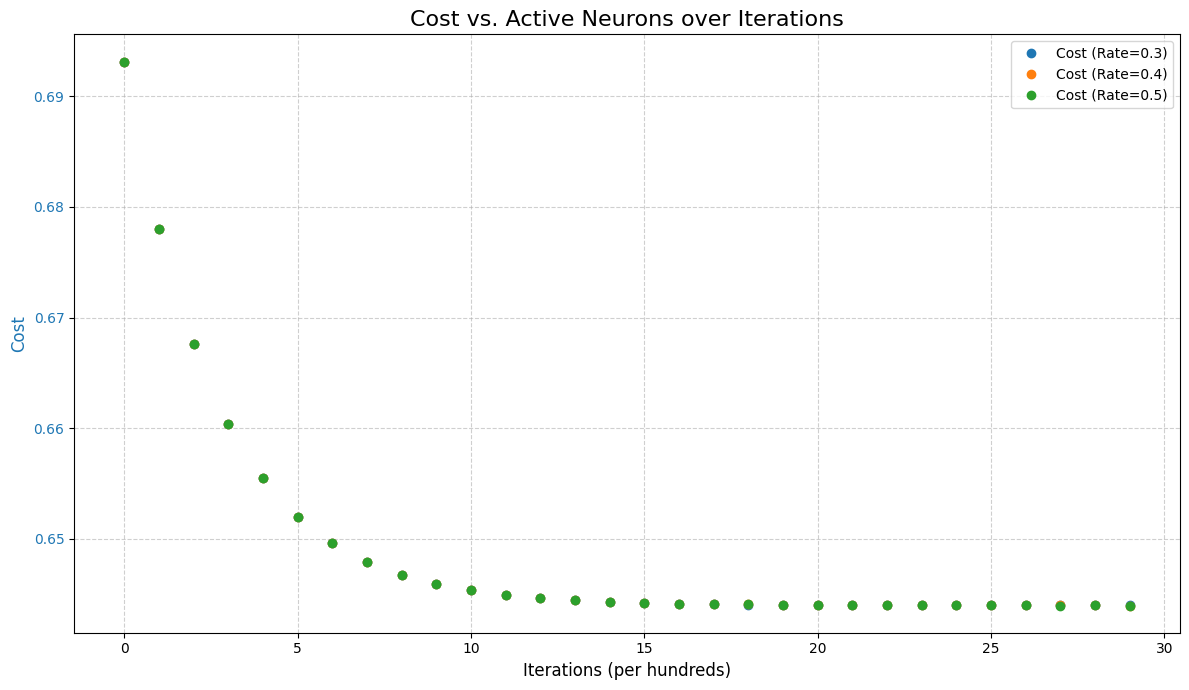

In [ ]:
parameters1, costs1, non_zero_avg1 = L_layer_model(train_x, train_y, layers_dims, print_cost = True, blackOutRate=0.3 )
parameters2, costs2, non_zero_avg2 = L_layer_model(train_x, train_y, layers_dims, print_cost = True, blackOutRate=0.4 )
parameters3, costs3, non_zero_avg3 = L_layer_model(train_x, train_y, layers_dims, print_cost = True, blackOutRate=0.5 )
print("\nAverage Non-Zero Activations:")
print(f"Rate 0.3: {non_zero_avg1:.4f}")
print(f"Rate 0.4: {non_zero_avg2:.4f}")
print(f"Rate 0.5: {non_zero_avg3:.4f}")

fig, ax1 = plt.subplots(figsize=(12, 7))
plt.title('Cost vs. Active Neurons over Iterations', fontsize=16)

ax1.set_xlabel('Iterations (per hundreds)', fontsize=12)
ax1.set_ylabel('Cost', color='tab:blue', fontsize=12)
p1 = ax1.plot(np.squeeze(costs1), 'o', color='C0', label='Cost (Rate=0.3)')[0]
p2 = ax1.plot(np.squeeze(costs2), 'o', color='C1', label='Cost (Rate=0.4)')[0]
p3 = ax1.plot(np.squeeze(costs3), 'o', color='C2', label='Cost (Rate=0.5)')[0]
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.6)

ax1.legend(handles=[p1, p2, p3], loc='upper right')

fig.tight_layout() 
plt.show()

In [91]:
predictions_train = predict(train_x, train_y, parameters1, rate=0.3)
predictions_test = predict(test_x, test_y, parameters1, rate=0.3)

predictions_train = predict(train_x, train_y, parameters2, rate=0.4)
predictions_test = predict(test_x, test_y, parameters2, rate=0.4)

predictions_train = predict(train_x, train_y, parameters3, rate=0.5)
predictions_test = predict(test_x, test_y, parameters3, rate=0.5)

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001
Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001
Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001


Cost after iteration 0: 0.693434
Cost after iteration 100: 0.651762
Cost after iteration 200: 0.638194
Cost after iteration 300: 0.632194
Cost after iteration 400: 0.627765
Cost after iteration 500: 0.624312
Cost after iteration 600: 0.621834
Cost after iteration 700: 0.620122
Cost after iteration 800: 0.618569
Cost after iteration 900: 0.617146
Cost after iteration 1000: 0.615567
Cost after iteration 1100: 0.614089
Cost after iteration 1200: 0.612413
Cost after iteration 1300: 0.610894
Cost after iteration 1400: 0.609478
Cost after iteration 1500: 0.608061
Cost after iteration 1600: 0.606730
Cost after iteration 1700: 0.605390
Cost after iteration 1800: 0.603988
Cost after iteration 1900: 0.602509
Cost after iteration 2000: 0.600955
Cost after iteration 2100: 0.599384
Cost after iteration 2200: 0.597381
Cost after iteration 2300: 0.595284
Cost after iteration 2400: 0.593394
Cost after iteration 2500: 0.591669
Cost after iteration 2600: 0.589951
Cost after iteration 2700: 0.588214
Cost

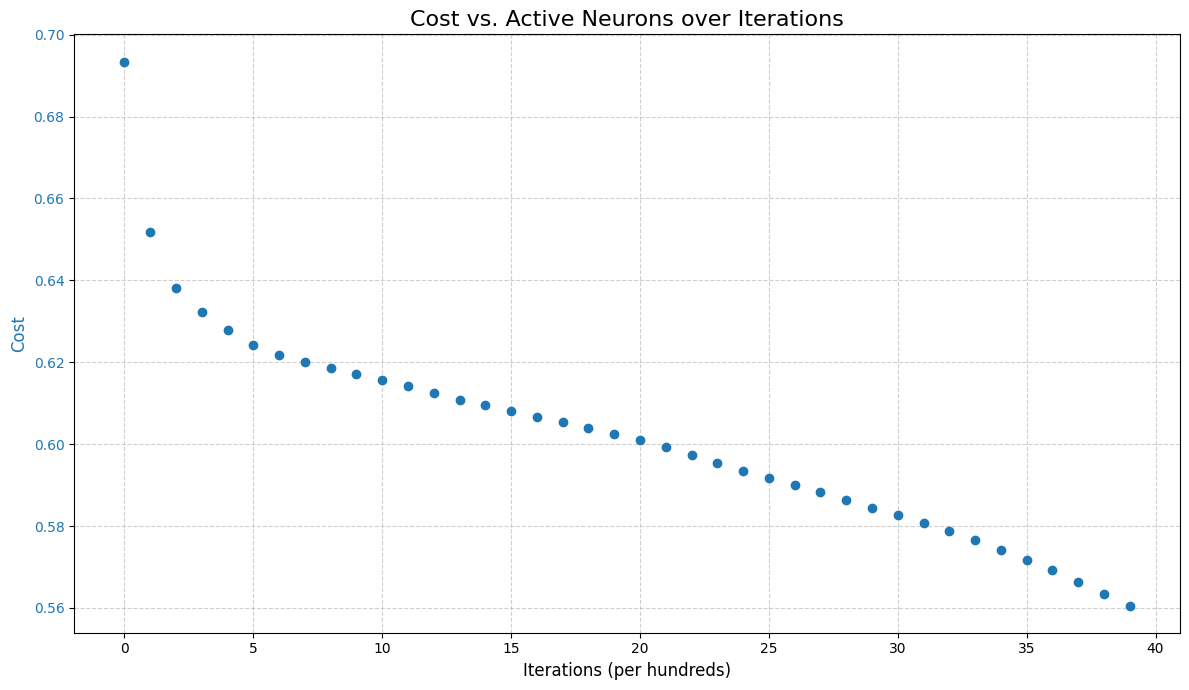

In [ ]:

parameters1, costs1 = L_layer_model_BN(train_x, train_y, layers_dims, print_cost = True)

fig, ax1 = plt.subplots(figsize=(12, 7))
plt.title('Cost vs. Active Neurons over Iterations', fontsize=16)

ax1.set_xlabel('Iterations (per hundreds)', fontsize=12)
ax1.set_ylabel('Cost', color='tab:blue', fontsize=12)
p1 = ax1.plot(np.squeeze(costs1), 'o', color='C0')[0]
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.6)


fig.tight_layout() 
plt.show()

### How to use on new Image

In [ ]:
#my_image = "my_image.jpg" # change this to the name of your image file 
#my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

#fname = "images/" + my_image
#image = np.array(ndimage.imread(fname, flatten=False))
#my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
#my_image = my_image/255.
#my_predicted_image = predict(my_image, my_label_y, parameters)

#plt.imshow(image)
#print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")